In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 

In [2]:
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)

In [3]:
df['MedianHouseValue'] = y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

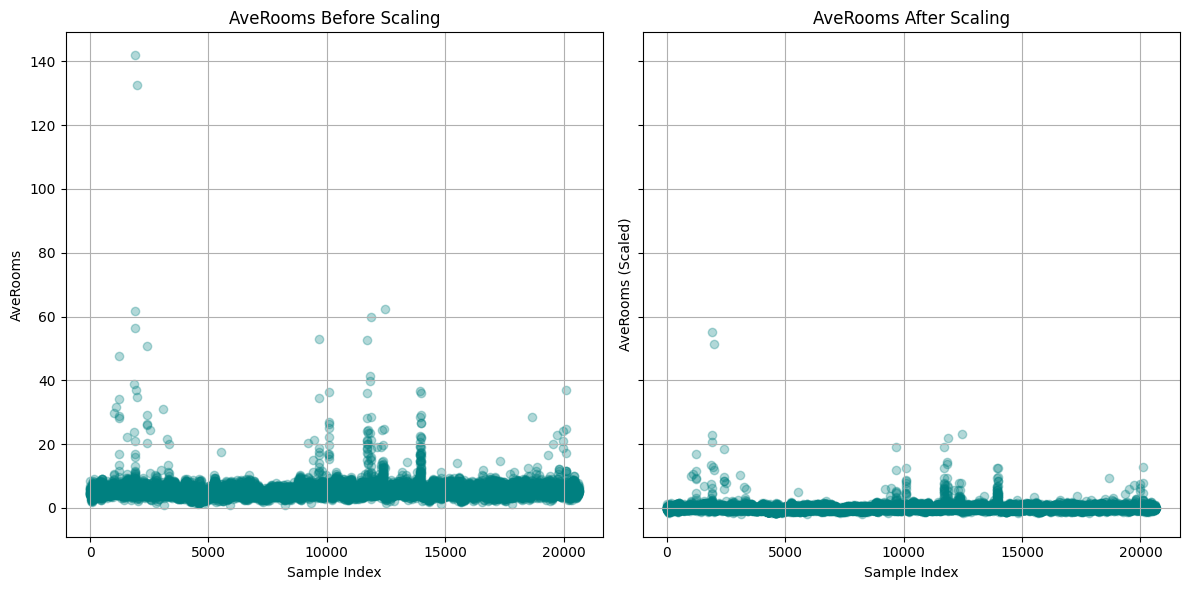

In [4]:
feature = 'AveRooms' 

scaler = StandardScaler()
X_features = df.drop(columns=['MedianHouseValue'], errors='ignore')
X_scaled = scaler.fit_transform(X_features)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_features.columns)
x_idx = range(len(df))
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Before scaling
axs[0].scatter(x_idx, df[feature], alpha=0.3, color='teal')
axs[0].set_title(f'{feature} Before Scaling')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel(feature)
axs[0].grid(True)

# After scaling
axs[1].scatter(x_idx, X_scaled_df[feature], alpha=0.3, color='teal')
axs[1].set_title(f'{feature} After Scaling')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel(feature + ' (Scaled)')
axs[1].grid(True)

plt.tight_layout()
plt.show()

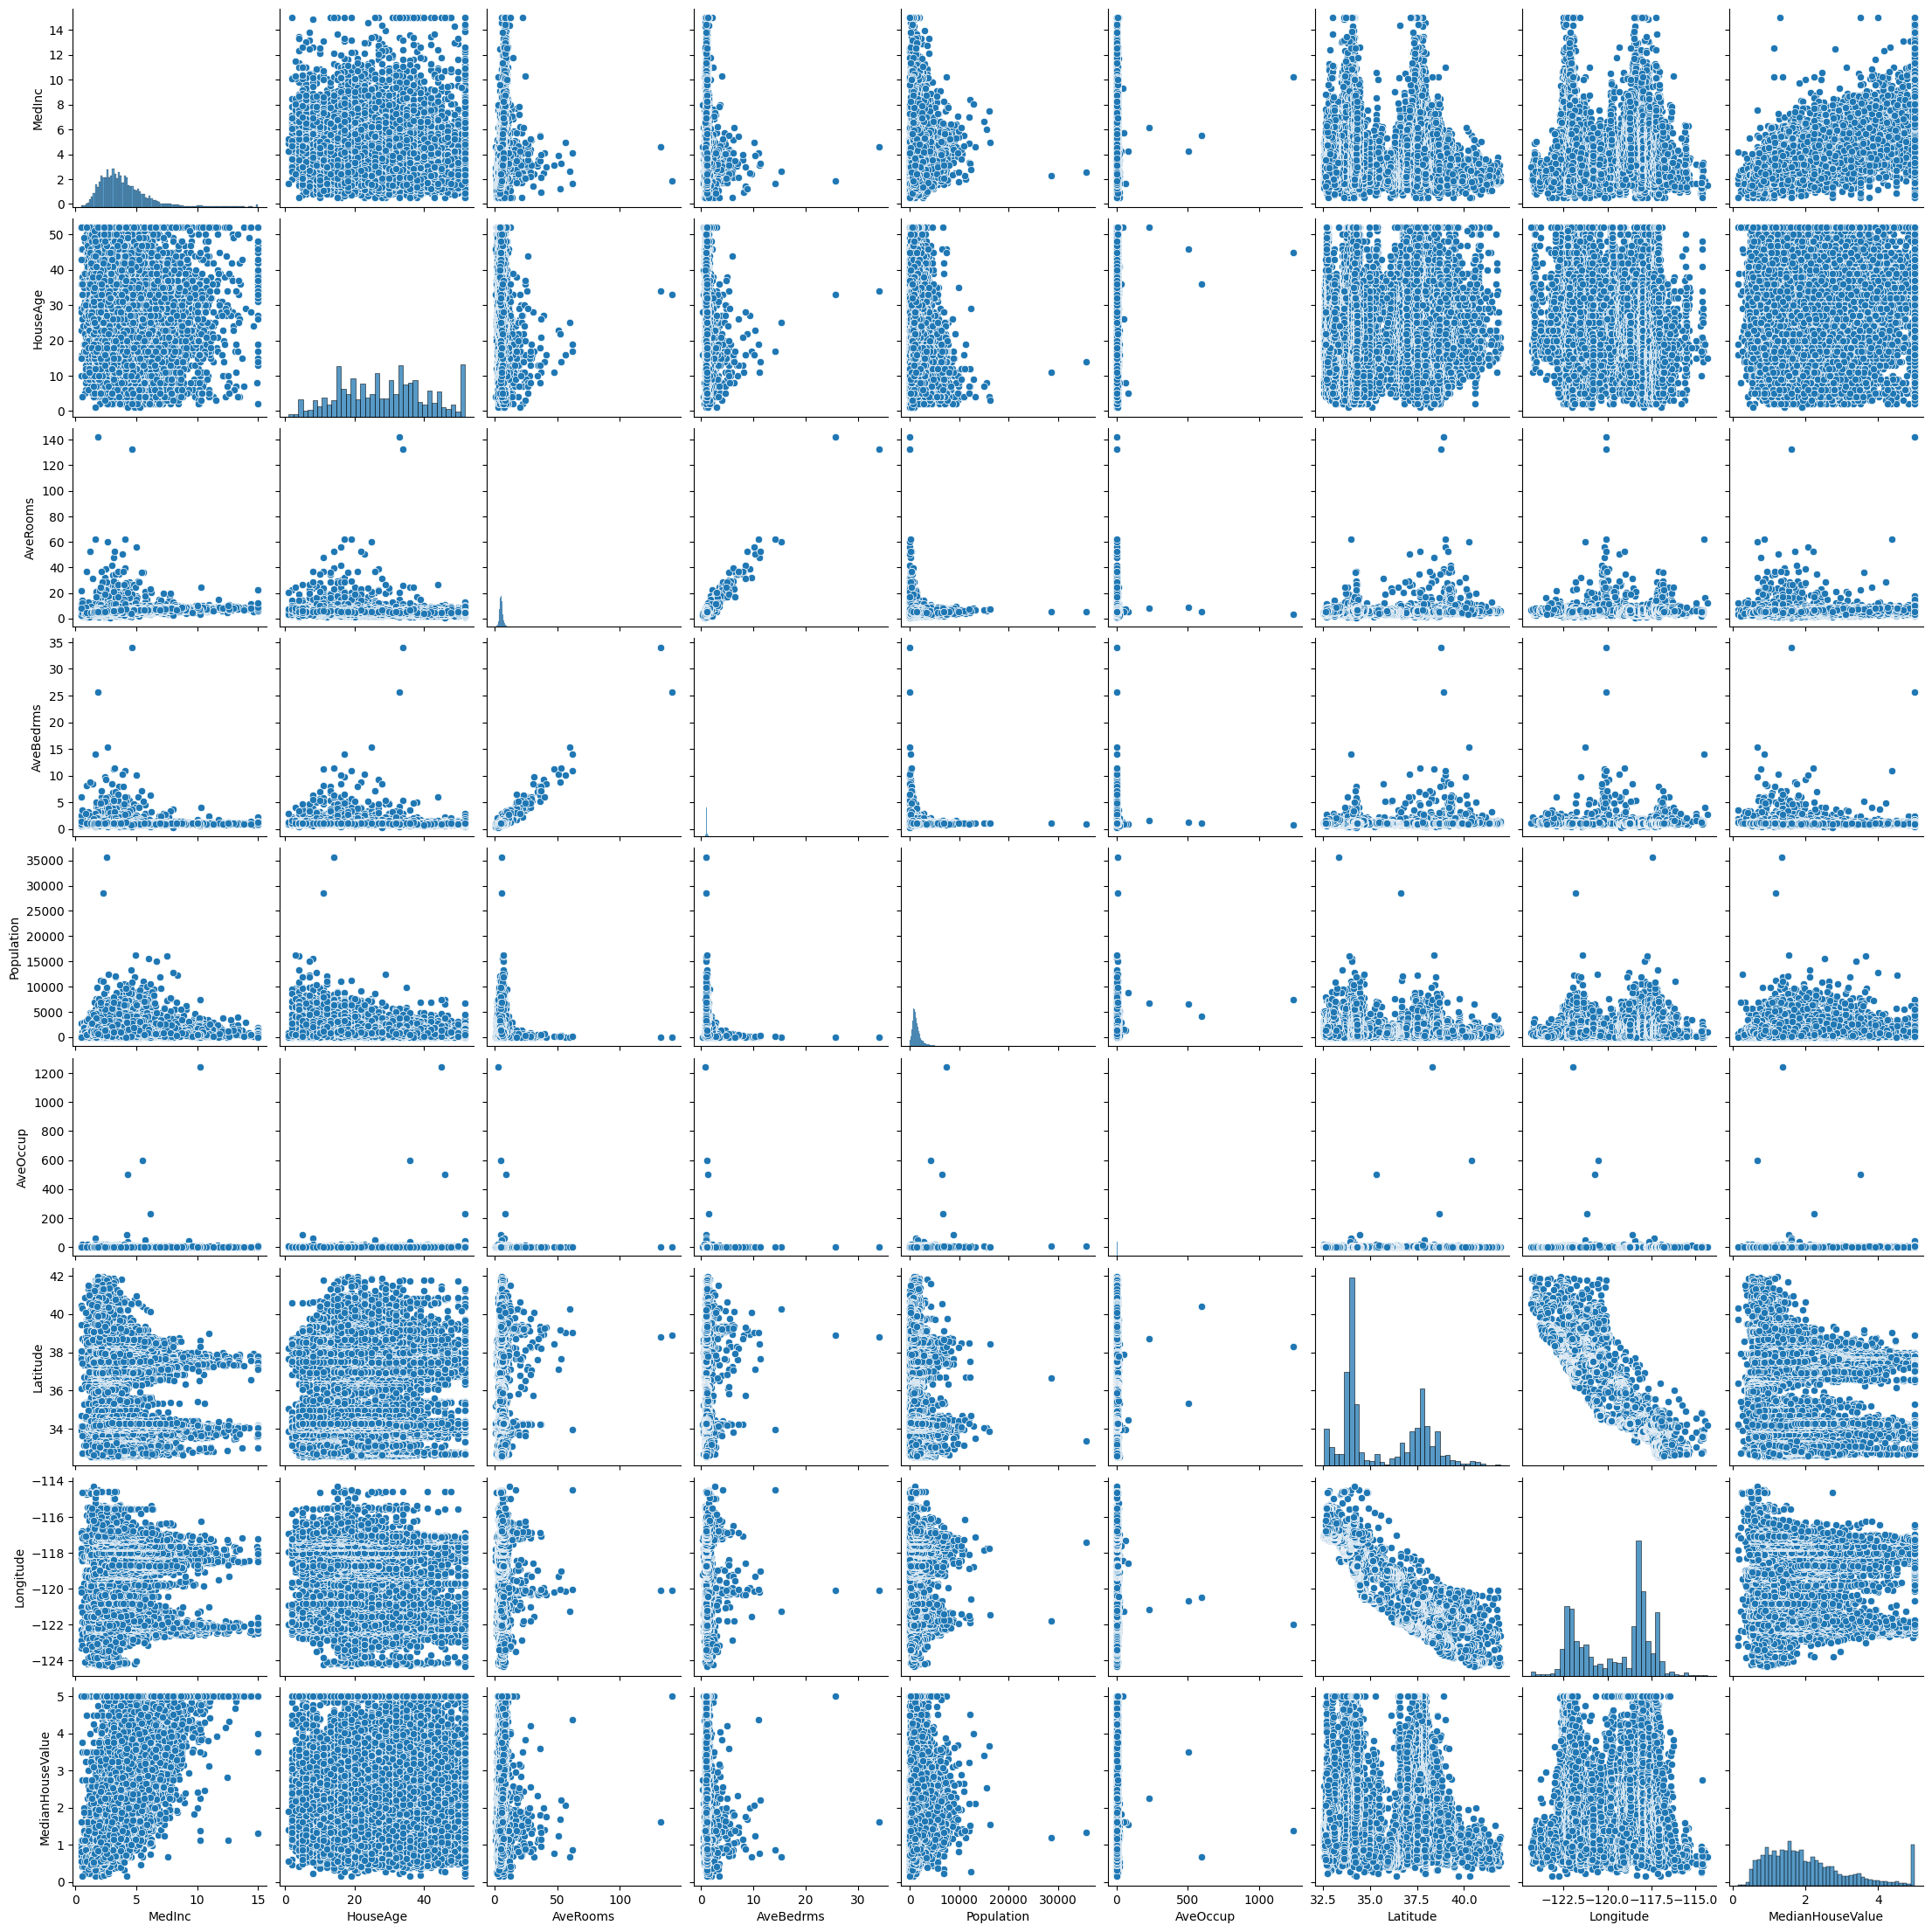

In [5]:
sns.pairplot(df)

<Axes: >

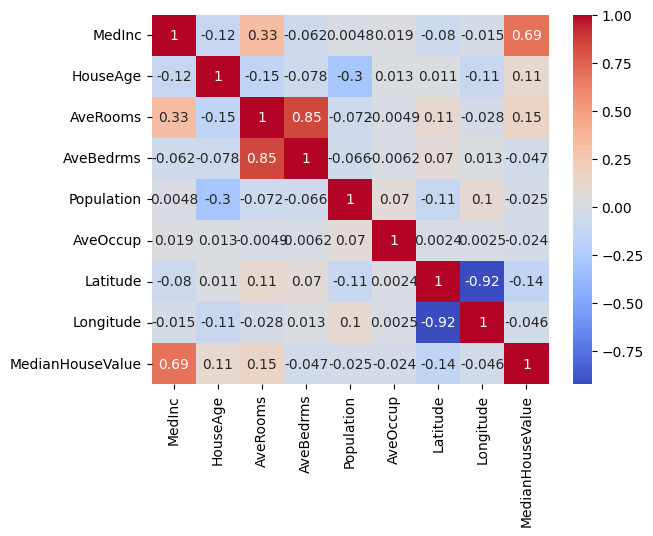

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [7]:
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedianHouseValue']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

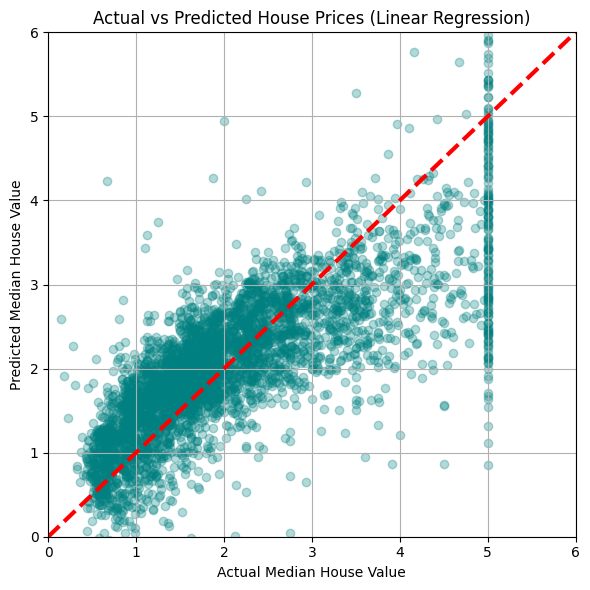

R²:  57.6%
MAE: 25.9% of mean
MSE: 36.3% of mean


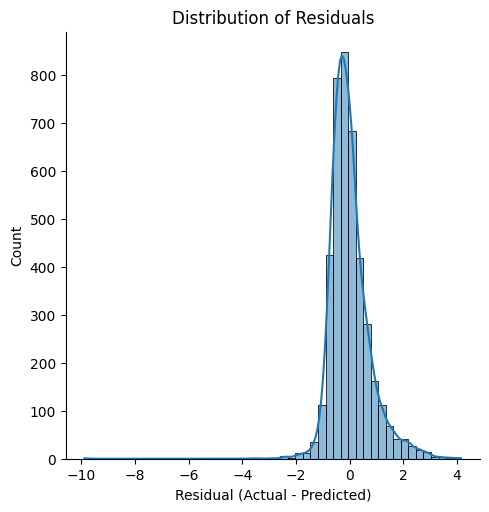

In [11]:


# 1. Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, predictions, alpha=0.3, color='teal')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.plot([0, 6], [0, 6], 'r--', linewidth=3)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True)
plt.tight_layout()
plt.show()

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mean_actual = y_test.mean()

print(f"R²:  {r2*100:.1f}%")
print(f"MAE: {mae/mean_actual*100:.1f}% of mean")
print(f"MSE: {mse/mean_actual*100:.1f}% of mean")



# Residuals plot
residuals = y_test - predictions
sns.displot(residuals, bins=50, kde=True)
plt.xlabel('Residual (Actual - Predicted)')
plt.title('Distribution of Residuals')
plt.show()

## after filtering with higher R^2

R²:  68.1%
MAE: 22.8% of mean
RMSE: 30.8% of mean


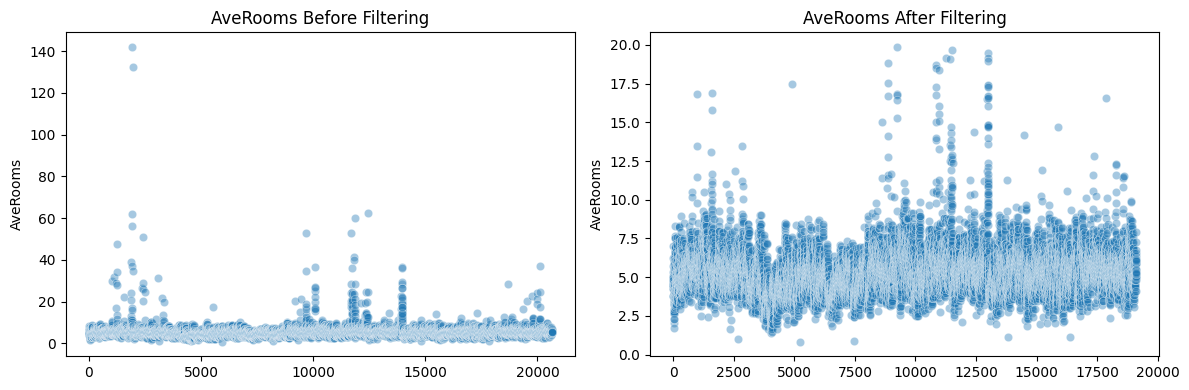

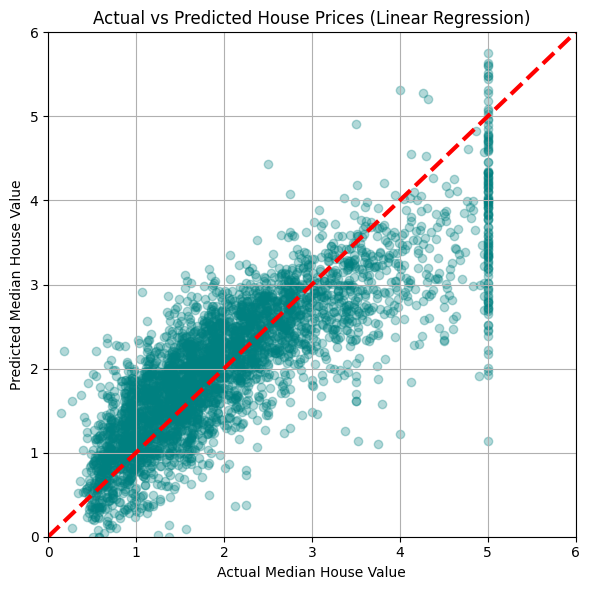

['linear_regression_scaler.pkl']

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

# Apply filtering to remove outliers from all features
df_filtered = df[
    (df['MedInc'] < 15) &
    (df['HouseAge'] < 52) &
    (df['AveRooms'] < 20) &
    (df['AveBedrms'] < 5) &
    (df['Population'] < 10000) &
    (df['AveOccup'] < 10) &
    (df['Latitude'] <= 42) & (df['Latitude'] >= 32) &
    (df['Longitude'] <= -114) & (df['Longitude'] >= -124)
]

# Define features and target
X = df_filtered.drop('Price', axis=1)
y = df_filtered['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mean_actual = y_test.mean()

print(f"R²:  {r2*100:.1f}%")
print(f"MAE: {mae/mean_actual*100:.1f}% of mean")
print(f"RMSE: {rmse/mean_actual*100:.1f}% of mean") ##  Helps "Is this error small relative to the average price?"

# Plot AveRooms before and after filtering
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(x=np.arange(len(df['AveRooms'])), y=df['AveRooms'], ax=axes[0], alpha=0.4)
axes[0].set_title('AveRooms Before Filtering')
axes[0].set_ylabel('AveRooms')

sns.scatterplot(x=np.arange(len(df_filtered['AveRooms'])), y=df_filtered['AveRooms'], ax=axes[1], alpha=0.4)
axes[1].set_title('AveRooms After Filtering')
axes[1].set_ylabel('AveRooms')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.plot([0, 6], [0, 6], 'r--', linewidth=3)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.grid(True)
plt.tight_layout()
plt.show()

import joblib

joblib.dump(model, "linear_regression_model.pkl")
joblib.dump(scaler, "linear_regression_scaler.pkl")

In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

# Apply filtering to remove outliers from all features
df_filtered = df[
    (df['MedInc'] < 15) &
    (df['HouseAge'] < 52) &
    (df['AveRooms'] < 20) &
    (df['AveBedrms'] < 5) &
    (df['Population'] < 10000) &
    (df['AveOccup'] < 10) &
    (df['Latitude'] <= 42) & (df['Latitude'] >= 32) &
    (df['Longitude'] <= -114) & (df['Longitude'] >= -124)
]

# Define features and target
X = df_filtered.drop('Price', axis=1)
y = df_filtered['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Bayesian Ridge Regression": BayesianRidge()
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_actual = y_test.mean()
    results.append({
        "Model": name,
        "R² (%)": r2 * 100,
        "MAE (% of mean)": mae / mean_actual * 100,
        "RMSE (% of mean)": rmse / mean_actual * 100
    })

results_df = pd.DataFrame(results)
best_r2 = results_df["R² (%)"].max()
print(f"{best_r2:.2f}")
# Round all metrics to 2 decimal places for better readability
results_df_rounded = results_df.round(2)

from tabulate import tabulate
print(tabulate(results_df_rounded, headers='keys', tablefmt='pretty', showindex=False))



68.07
+---------------------------+--------+-----------------+------------------+
|           Model           | R² (%) | MAE (% of mean) | RMSE (% of mean) |
+---------------------------+--------+-----------------+------------------+
|     Linear Regression     | 68.07  |      22.79      |      30.79       |
|     Ridge Regression      | 68.07  |      22.79      |      30.79       |
|     Lasso Regression      |  55.9  |      27.38      |      36.19       |
|   ElasticNet Regression   | 59.47  |      26.15      |      34.69       |
| Bayesian Ridge Regression | 68.07  |      22.79      |      30.79       |
+---------------------------+--------+-----------------+------------------+
